# Importing Modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
data = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')

# Data Exploration

In [3]:
data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
data.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
data.describe(include='all')

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,45307.000000,NaN,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,NaN,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,NaN,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,NaN,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,NaN,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000


In [6]:
data.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

<Axes: >

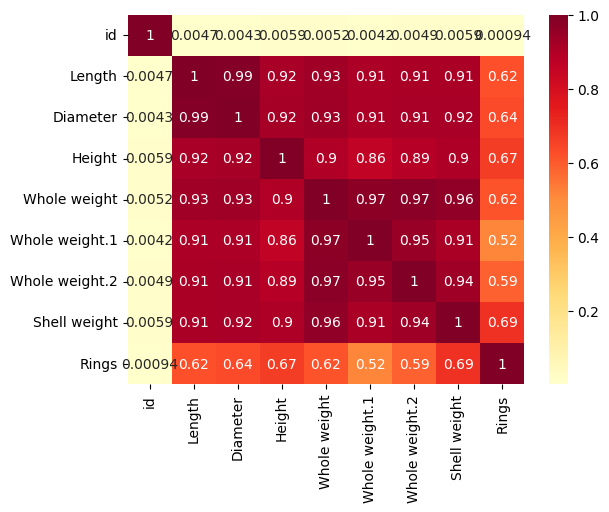

In [7]:
sns.heatmap(data.drop(['Sex'], axis=1).corr(), annot=True, cmap='YlOrRd')

In [8]:
sex_category = pd.get_dummies(data['Sex'])
data = pd.concat([data, sex_category], axis=1)

data = data.drop(columns=['id', 'Sex'], axis=1)

data.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,F,I,M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,True,False,False
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,True,False,False
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,False,True,False
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,False,True
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,False,True,False


In [9]:
X = data.drop('Rings', axis=1)
y = data['Rings']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=40)

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Whole weight.1'}>,
        <Axes: title={'center': 'Whole weight.2'}>],
       [<Axes: title={'center': 'Shell weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

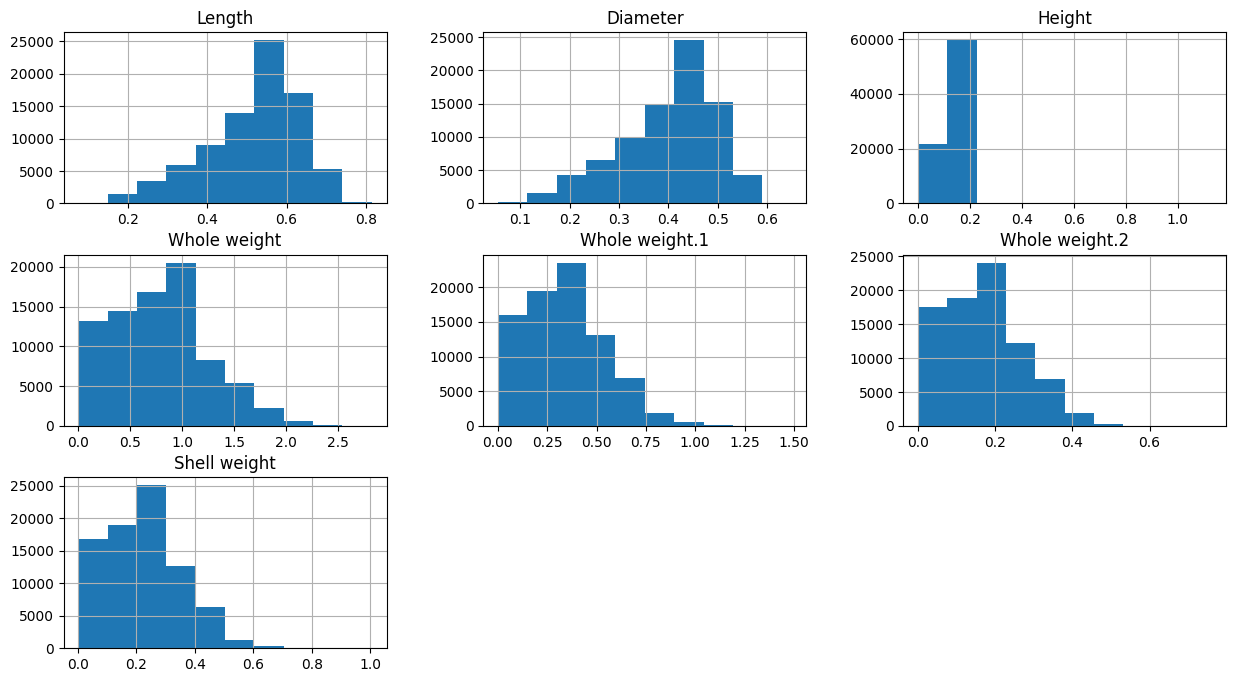

In [11]:
X_train.hist(figsize=(15,8))

# Set Base-line Score

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.score(X_valid, y_valid)

0.6241446860255622

# Data Preprocessing

In [14]:
X_train['Length'] = np.log(X_train['Length'] + 1)
X_train['Diameter'] = np.log(X_train['Diameter'] + 1)
X_train['Whole weight'] = np.log(X_train['Whole weight'] + 1)
X_train['Whole weight.1'] = np.log(X_train['Whole weight.1'] + 1)
X_train['Whole weight.2'] = np.log(X_train['Whole weight.2'] + 1)
X_train['Shell weight'] = np.log(X_train['Shell weight'] + 1)

X_valid['Length'] = np.log(X_valid['Length'] + 1)
X_valid['Diameter'] = np.log(X_valid['Diameter'] + 1)
X_valid['Whole weight'] = np.log(X_valid['Whole weight'] + 1)
X_valid['Whole weight.1'] = np.log(X_valid['Whole weight.1'] + 1)
X_valid['Whole weight.2'] = np.log(X_valid['Whole weight.2'] + 1)
X_valid['Shell weight'] = np.log(X_valid['Shell weight'] + 1)

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Whole weight.1'}>,
        <Axes: title={'center': 'Whole weight.2'}>],
       [<Axes: title={'center': 'Shell weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

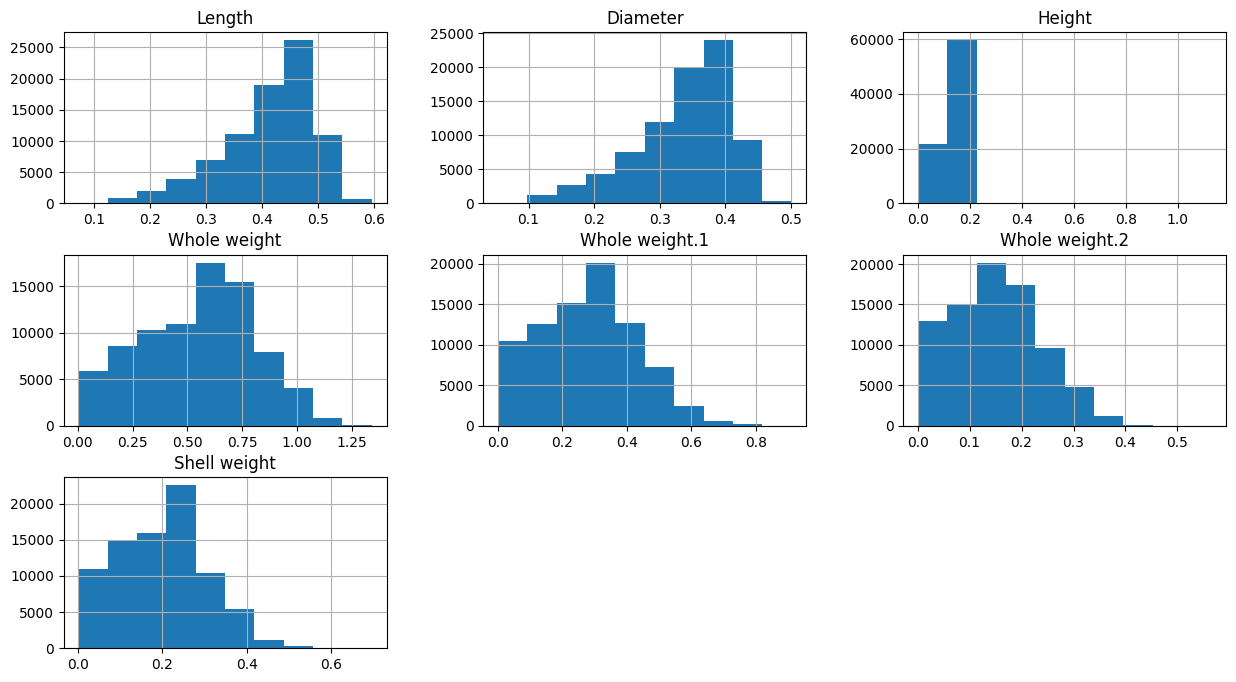

In [15]:
X_train.hist(figsize=(15, 8))

# Feature Engineering

In [16]:
X_train['ratio_shell_weight_whole_weight'] = X_train['Shell weight'] / X_train['Whole weight']
X_train['volume'] = X_train['Length'] * X_train['Diameter'] * X_train['Height']

X_valid['ratio_shell_weight_whole_weight'] = X_valid['Shell weight'] / X_valid['Whole weight']
X_valid['volume'] = X_valid['Length'] * X_valid['Diameter'] * X_valid['Height']

<Axes: >

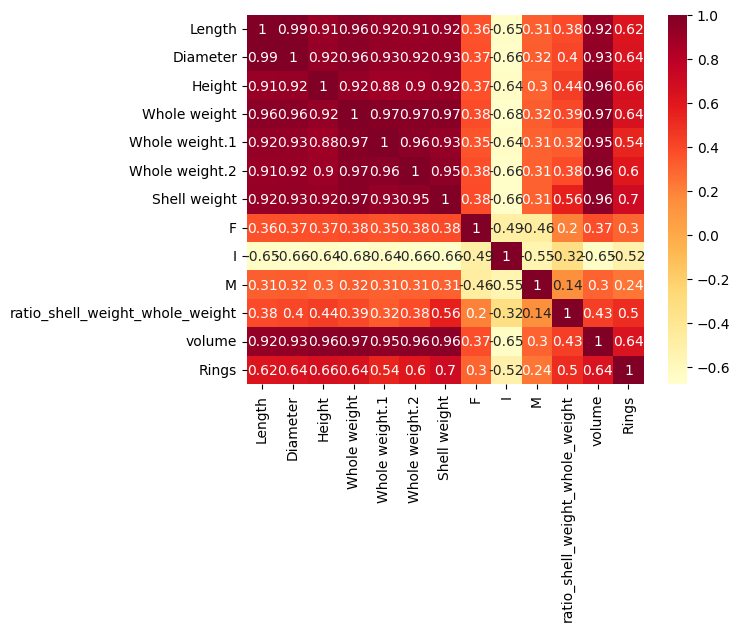

In [17]:
sns.heatmap(X_train.join(y_train).corr(), annot=True, cmap='YlOrRd')

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
model.score(X_valid, y_valid)

0.6654839506682362

In [20]:
y_valid_prediction = (model.predict(X_valid)).astype(int)

In [21]:
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_prediction, squared=False))
rmsle

0.39925127318099496

# Test Data Prediction

In [22]:
X_test = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

In [23]:
sex_category = pd.get_dummies(X_test['Sex'])
X_test = pd.concat([X_test, sex_category], axis=1)

X_test_id = X_test['id']

X_test = X_test.drop(columns=['id', 'Sex'], axis=1)

In [24]:
X_test['Length'] = np.log(X_test['Length'] + 1)
X_test['Diameter'] = np.log(X_test['Diameter'] + 1)
X_test['Whole weight'] = np.log(X_test['Whole weight'] + 1)
X_test['Whole weight.1'] = np.log(X_test['Whole weight.1'] + 1)
X_test['Whole weight.2'] = np.log(X_test['Whole weight.2'] + 1)
X_test['Shell weight'] = np.log(X_test['Shell weight'] + 1)

In [25]:
X_test['ratio_shell_weight_whole_weight'] = X_test['Shell weight'] / X_test['Whole weight']
X_test['volume'] = X_test['Length'] * X_test['Diameter'] * X_test['Height']

In [26]:
X_test_prediction = (model.predict(X_test)).astype(int)

In [27]:
y_test = pd.DataFrame({'id': X_test_id, 'Rings': X_test_prediction})

In [28]:
y_test.to_csv('/kaggle/working/predictions.csv', index=False)